<a href="https://colab.research.google.com/github/muffin-head/GANs_AutoEncoders/blob/main/tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from tensorflow.examples.tutorials.mnist.input_data import input_data

ModuleNotFoundError: No module named 'tensorflow.examples'

In [48]:
from tensorflow.keras.datasets import mnist

In [49]:
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

# Normalize the images to [0, 1], flatten them, and ensure dtype is tf.float32
train_images = tf.cast(train_images.reshape(-1, 784) / 255.0, tf.float32)
train_labels = tf.one_hot(train_labels, depth=10)

# Proceed with the rest of your code...


In [ ]:
train_images,test_images=train_images/255.0,test_images/255.0

In [ ]:
import numpy as np

In [ ]:
train_images.shape[0],test_images.shape[0]

(60000, 10000)

In [ ]:
train_images.shape[1]*train_images.shape[2]

784

In [ ]:
len(np.unique(train_labels))

10

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12707095218897085134
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11307089556464436990
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
x=tf.keras.Input(shape=(None,784))

In [ ]:
w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [ ]:
y=tf.keras.layers.Softmax()(tf.matmul(x,w)+b)

In [ ]:
y_=tf.keras.Input(shape=(None,10))

In [ ]:
cross_entropy=tf.reduce_mean(-tf.reduce_sum(y * tf.math.log(y),1))

In [52]:
import tensorflow as tf

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

# Normalize the images to [0, 1], flatten them, and ensure dtype is tf.float32
train_images = tf.cast(train_images.reshape(-1, 784) / 255.0, tf.float32)
train_labels = tf.one_hot(train_labels, depth=10)

# Proceed with the rest of your code...

# Model function
def model(x):
	return tf.keras.layers.Softmax()(tf.matmul(x,w)+b)

# Cross-entropy loss function
def cross_entropy(y_true, y_pred):
	return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=[1]))

# Initialize the SGD optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.05)

# Example: Calculate loss and apply gradients for the first batch of 32 images
batch_size = 32
x_batch = train_images[:batch_size]
y_true_batch = train_labels[:batch_size]

# Compute the predictions and loss using tf.GradientTape for automatic differentiation
with tf.GradientTape() as tape:
	y_pred_batch = model(x_batch)
	loss = cross_entropy(y_true_batch, y_pred_batch)

# Calculate gradients of loss with respect to the model variables
gradients = tape.gradient(loss, [w, b])
print("W before update:", w.numpy()[:5])  # Print the first 5 elements for brevity
print("b before update:", b.numpy())

optimizer.apply_gradients(zip(gradients, [w, b]))

print("W after update:", w.numpy()[:5])  # Again, just the first 5 elements
print("b after update:", b.numpy())

# Apply the gradients to the optimizer

print("Cross-entropy loss for the first batch after applying gradients:", loss.numpy())



W before update: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
b before update: [-0.00374062  0.00872809  0.00249376  0.00561093  0.00249376 -0.00374062
 -0.00374062 -0.00374062 -0.00374062 -0.00062343]
W after update: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
b after update: [-0.00559691  0.01305931  0.00373132  0.00839535  0.00373132 -0.00559691
 -0.00559691 -0.00559691 -0.00559691 -0.00093276]
Cross-entropy loss for the first batch after applying gradients: 2.3006854


In [53]:
import tensorflow as tf
import numpy as np

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (_, _) = mnist.load_data()

# Normalize the images to [0, 1], flatten them, and ensure dtype is tf.float32
train_images = tf.cast(train_images.reshape(-1, 784) / 255.0, tf.float32)
train_labels = tf.one_hot(train_labels, depth=10)

# Variables for model parameters
w = tf.Variable(tf.random.normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))

# Model function
def model(x):
    return tf.keras.layers.Softmax()(tf.matmul(x, w) + b)

# Cross-entropy loss function
def cross_entropy(y_true, y_pred):
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred), axis=[1]))

# Initialize the SGD optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.05)

# Number of epochs and batch size
epochs = 10
batch_size = 32
steps_per_epoch = len(train_images) // batch_size

# Training loop for multiple epochs
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        # Slice a batch of data
        batch_start = step * batch_size
        batch_end = batch_start + batch_size
        x_batch = train_images[batch_start:batch_end]
        y_true_batch = train_labels[batch_start:batch_end]

        # Compute predictions and loss within a GradientTape context
        with tf.GradientTape() as tape:
            y_pred_batch = model(x_batch)
            loss = cross_entropy(y_true_batch, y_pred_batch)

        # Calculate gradients and update model parameters
        gradients = tape.gradient(loss, [w, b])
        optimizer.apply_gradients(zip(gradients, [w, b]))

    # Optional: Print loss at the end of each epoch
    print(f"Epoch {epoch + 1}, Loss: {loss.numpy()}")


Epoch 1, Loss: 0.1775708794593811
Epoch 2, Loss: 0.14608615636825562
Epoch 3, Loss: 0.13153254985809326
Epoch 4, Loss: 0.12244536727666855
Epoch 5, Loss: 0.11608962714672089
Epoch 6, Loss: 0.11136554926633835
Epoch 7, Loss: 0.1077132523059845
Epoch 8, Loss: 0.10480792820453644
Epoch 9, Loss: 0.10244493186473846
Epoch 10, Loss: 0.10048765689134598


#Input-> sigmoid hidden layer-> sigmoid outut layer




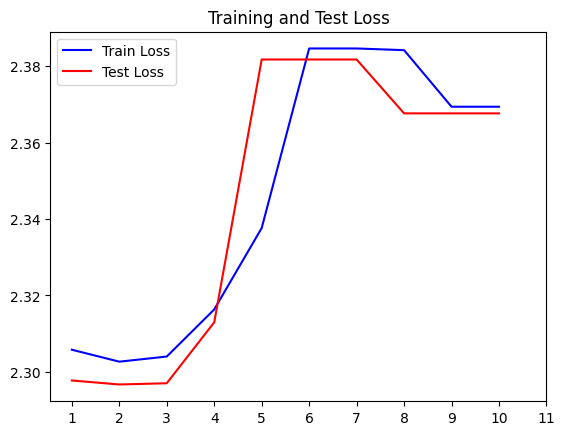

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [0, 1], flatten them, and ensure dtype is tf.float32
train_images = tf.cast(train_images.reshape(-1, 784) / 255.0, tf.float32)
train_labels = tf.one_hot(train_labels, depth=10)

# Do the same preprocessing for test images and labels
test_images = tf.cast(test_images.reshape(-1, 784) / 255.0, tf.float32)
test_labels = tf.one_hot(test_labels, depth=10)

fig, ax = plt.subplots(1, 1)
plt.ion()


n_hidden_layer1=512
n_hidden_layer2=128
n_classes=10
input_shape=784


# Your dataset loading and preprocessing code remains unchanged

# Fixed weights and biases initialization
weights = {
    'h1': tf.Variable(tf.random.normal([input_shape, n_hidden_layer1], stddev=0.039, mean=0)),
    'h2': tf.Variable(tf.random.normal([n_hidden_layer1, n_hidden_layer2], stddev=0.055, mean=0)),
    'out': tf.Variable(tf.random.normal([n_hidden_layer2, n_classes], stddev=0.120, mean=0))
}

biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_layer1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_layer2])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}

# Fixed MLP model function
def mlp(x, weights, biases):
    layer1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer1 = tf.nn.sigmoid(layer1)

    layer2 = tf.add(tf.matmul(layer1, weights['h2']), biases['b2'])
    layer2 = tf.nn.sigmoid(layer2)

    output_layer = tf.add(tf.matmul(layer2, weights['out']), biases['out'])
    output_layer = tf.nn.sigmoid(output_layer)

    return output_layer

optimizer = tf.optimizers.Adam(learning_rate=0.005)
# Updated training loop with dynamic plotting
train_losses = []
test_losses = []

# Fixed dynamic plotting function
def dyn_plot(x, y, y_test, ax, ticks, title):
    ax.clear()
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_test, 'r', label="Test Loss")
    plt.xticks(ticks)
    plt.legend()
    plt.title(title)
    fig.canvas.draw()

# Train and evaluate the model
for epoch in range(epochs):
    epoch_loss = 0
    for step in range(steps_per_epoch):
        batch_start = step * batch_size
        batch_end = batch_start + batch_size
        x_batch = train_images[batch_start:batch_end]
        y_true_batch = train_labels[batch_start:batch_end]

        with tf.GradientTape() as tape:
            y_pred_batch = mlp(x_batch, weights, biases)
            loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred_batch, labels=y_true_batch))
            epoch_loss += loss.numpy()

        gradients = tape.gradient(loss, list(weights.values()) + list(biases.values()))
        optimizer.apply_gradients(zip(gradients, list(weights.values()) + list(biases.values())))

    train_losses.append(epoch_loss / steps_per_epoch)

    # Test loss calculation
    y_pred_test = mlp(test_images, weights, biases)
    test_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred_test, labels=test_labels))
    test_losses.append(test_loss.numpy())

    # Dynamic plot update
    dyn_plot(list(range(1, epoch + 2)), train_losses, test_losses, ax, np.arange(1, epoch + 3), "Training and Test Loss")

plt.ioff()  # Turn off interactive mode
plt.show()



#Input-> relu hidden layer-> relu outut layer




In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images to [0, 1], flatten them, and ensure dtype is tf.float32
train_images = tf.cast(train_images.reshape(-1, 784) / 255.0, tf.float32)
train_labels = tf.one_hot(train_labels, depth=10)

# Do the same preprocessing for test images and labels
test_images = tf.cast(test_images.reshape(-1, 784) / 255.0, tf.float32)
test_labels = tf.one_hot(test_labels, depth=10)

fig, ax = plt.subplots(1, 1)
plt.ion()


n_hidden_layer1=512
n_hidden_layer2=128
n_classes=10
input_shape=784


# Your dataset loading and preprocessing code remains unchanged

# Fixed weights and biases initialization
weights = {
    'h1': tf.Variable(tf.random.normal([input_shape, n_hidden_layer1], stddev=0.039, mean=0)),
    'h2': tf.Variable(tf.random.normal([n_hidden_layer1, n_hidden_layer2], stddev=0.055, mean=0)),
    'out': tf.Variable(tf.random.normal([n_hidden_layer2, n_classes], stddev=0.120, mean=0))
}

biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_layer1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_layer2])),
    'out': tf.Variable(tf.random.normal([n_classes]))
}

# Fixed MLP model function
def mlp(x, weights, biases):
    layer1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer1 = tf.nn.relu(layer1)

    layer2 = tf.add(tf.matmul(layer1, weights['h2']), biases['b2'])
    layer2 = tf.nn.relu(layer2)

    output_layer = tf.add(tf.matmul(layer2, weights['out']), biases['out'])
    output_layer = tf.nn.sigmoid(output_layer)

    return output_layer

optimizer = tf.optimizers.Adam(learning_rate=0.005)
# Updated training loop with dynamic plotting
train_losses = []
test_losses = []

# Fixed dynamic plotting function
def dyn_plot(x, y, y_test, ax, ticks, title):
    ax.clear()
    ax.plot(x, y, 'b', label="Train Loss")
    ax.plot(x, y_test, 'r', label="Test Loss")
    plt.xticks(ticks)
    plt.legend()
    plt.title(title)
    fig.canvas.draw()

# Train and evaluate the model
for epoch in range(epochs):
    epoch_loss = 0
    for step in range(steps_per_epoch):
        batch_start = step * batch_size
        batch_end = batch_start + batch_size
        x_batch = train_images[batch_start:batch_end]
        y_true_batch = train_labels[batch_start:batch_end]

        with tf.GradientTape() as tape:
            y_pred_batch = mlp(x_batch, weights, biases)
            loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred_batch, labels=y_true_batch))
            epoch_loss += loss.numpy()

        gradients = tape.gradient(loss, list(weights.values()) + list(biases.values()))
        optimizer.apply_gradients(zip(gradients, list(weights.values()) + list(biases.values())))

    train_losses.append(epoch_loss / steps_per_epoch)

    # Test loss calculation
    y_pred_test = mlp(test_images, weights, biases)
    test_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred_test, labels=test_labels))
    test_losses.append(test_loss.numpy())

    # Dynamic plot update
    dyn_plot(list(range(1, epoch + 2)), train_losses, test_losses, ax, np.arange(1, epoch + 3), "Training and Test Loss")

plt.ioff()  # Turn off interactive mode
plt.show()

